In [37]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import scipy as sp
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
heart = pd.read_excel("alldatasettowork.xlsx")
heart.columns = ['age', 'sex', 'chest_pain_type', 'rest_BP', 'cholesterol', 'fast_blood_sugar', 'rest_ECG', 'max_HR', 'ex_induced_angina', 
                  'ST_depression', 'st_slope', 'target']

In [39]:
Renamed_feature= []               #list of names that will rename to feature column
all_clf_res=[]                    #every classifier auc values are stored in it
random_initializer=100            #random initializer
n_dots=50
##########################################################
def Box_Gaussian(data):
  '''
  Parameters :
  Input - data is the pandas type variable

  Output - The Gaussian distribution plot for
  eight feature of input data 

  '''
  
  fig=plt.figure(figsize=(15,6), tight_layout=True)                                #define figure size
  fig.suptitle("Box - Gaussian plot")
  
  n_scaler = preprocessing.StandardScaler()                 #standardization function
  temp_Data = n_scaler.fit_transform(data)                  #pass into function for standrd.
  for i in range(5):                                        #loop for all 8 feature 
    
    plt.subplot(2, 3, i+1)                                  #subplot for 2 rows in 4 columns
    Data = temp_Data[:,i]                                   #data for every feature
    sns.kdeplot(Data, shade=True,color='red', alpha=0.3)    #kernel density function under red shaded arae
    ax = sns.boxplot(Data, saturation=0.9, color="green")   #boxplot  with green shaded area
                                                            # https://seaborn.pydata.org/generated/seaborn.kdeplot.html
                                                            # https://seaborn.pydata.org/generated/seaborn.boxplot.html
    plt.gca().invert_yaxis()                                #Reverse Y-Axis in PyPlot
    # plt.title('F'+str(i+1))
   # plt.xlabel('A')
    frame1 = plt.gca()
    #frame1.axes.xaxis.set_ticklabels([])                    #removing xlabel data 
    plt.ylim((-0.5,0.65))                                   #y axis  limit
    plt.tight_layout()                                      #This module provides routines to adjust subplot params so that subplots are nicely fit in the figure.
                                                            # https://matplotlib.org/api/tight_layout_api.html
    # plt.grid('on')
    
    for patch in ax.artists:
      r, g, b, a = patch.get_facecolor()                     #Get the facecolor of the Axes.
      patch.set_facecolor((r, g, b, 0.3))                    #set colour intensity
#################################################################################

def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()


#data plot on different input condition 
def data_plot (data,
               Pair_plot,
               Dist_Plot,
               Plot_violinplot,
               Plot_confusionMatrix,
               box_Gaussian):
  
  '''
  Parameters :
  Input - 
  data - It is the pandas type variable
  Pair_plot - for pair plot visualization of input  data  
  Dist_Plot- for gaussian distribution plot visualization of input  data  
  Plot_violinplot- for violin plot visualization of input  data  
  Plot_confusionMatrix -for confusion matrix visualization of input  data   
  
  Output - dataframe with outleir rejection
  filled with Input parameter

  '''
  if Pair_plot ==True:
    pair_plot(data)

  if Dist_Plot ==True:
    dist_Plot(data)

  if Plot_violinplot ==True:
    plot_violinplot (data)

  if Plot_confusionMatrix ==True:
    plot_confusionMatrix(data)

  if box_Gaussian ==True:
    Box_Gaussian(data)


############################################################


In [40]:
df_x = heart.loc[:, ['age', 'rest_BP','cholesterol','max_HR', 'ST_depression' ]]

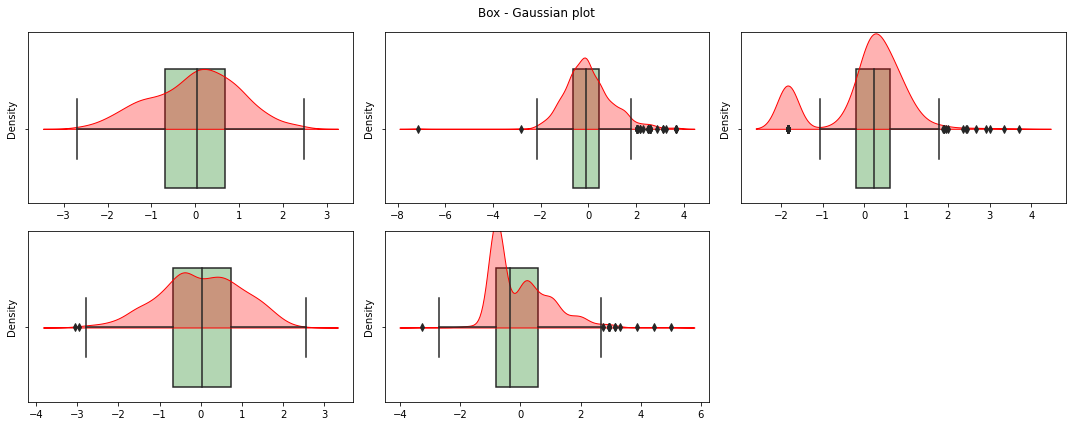

In [41]:
data_plot (df_x,
          Pair_plot=False,
          Dist_Plot=False,
          Plot_violinplot=False,
          Plot_confusionMatrix=False,
          box_Gaussian=True)

In [42]:
df_x = heart.loc[:, ['age', 'rest_BP','cholesterol','max_HR', 'ST_depression' ]]
df_x['mahala'] = mahalanobis(x=df_x, data=df_x)
df_x.head()

,age,rest_BP,cholesterol,max_HR,ST_depression,mahala
0,63,145,233,150,0.0,3.178103
1,67,160,286,108,1.5,4.998643
2,67,120,229,129,2.6,5.417429
3,37,130,250,187,3.5,15.704550
4,41,130,204,172,1.4,3.888091


In [43]:
from scipy.stats import chi2
threshold = chi2.ppf((1-0.1), df=5) # Tabachnick & Fidell (2007) suggest probability estimate of 0.001 to calculate threshold

df_x['Outliers'] = [1 if md > threshold else 0 for md in df_x['mahala']] # mark outliers for plotting
heart = heart[df_x['mahala'] <= threshold] # remove outliers
df_x[df_x['mahala'] > threshold] # show outliers

,age,rest_BP,cholesterol,max_HR,ST_depression,mahala,Outliers
3,37,130,250,187,3.5,15.704550,1
6,62,140,268,160,3.6,9.407854,1
68,59,170,326,140,3.4,9.669824,1
69,46,150,231,147,3.6,9.830783,1
91,62,160,164,145,6.2,28.691774,1
...,...,...,...,...,...,...,...
845,76,104,218,128,3.5,15.818121,1
855,62,120,220,73,0.0,9.985012,1
863,64,134,273,128,4.0,9.563204,1
887,69,130,271,84,0.0,9.627991,1


In [44]:
df_OR = heart.loc[:, ['age', 'rest_BP','cholesterol','max_HR', 'ST_depression' ]]
X_Data = heart.drop(['age','rest_BP','cholesterol','max_HR','ST_depression'], axis=1)
heart=pd.concat([df_OR,X_Data],axis=1)
#heart.dropna(axis=0)
heart.reset_index().isna().sum()

index                0
age                  0
rest_BP              0
cholesterol          0
max_HR               0
ST_depression        0
sex                  0
chest_pain_type      0
fast_blood_sugar     0
rest_ECG             0
ex_induced_angina    0
st_slope             0
target               0
dtype: int64

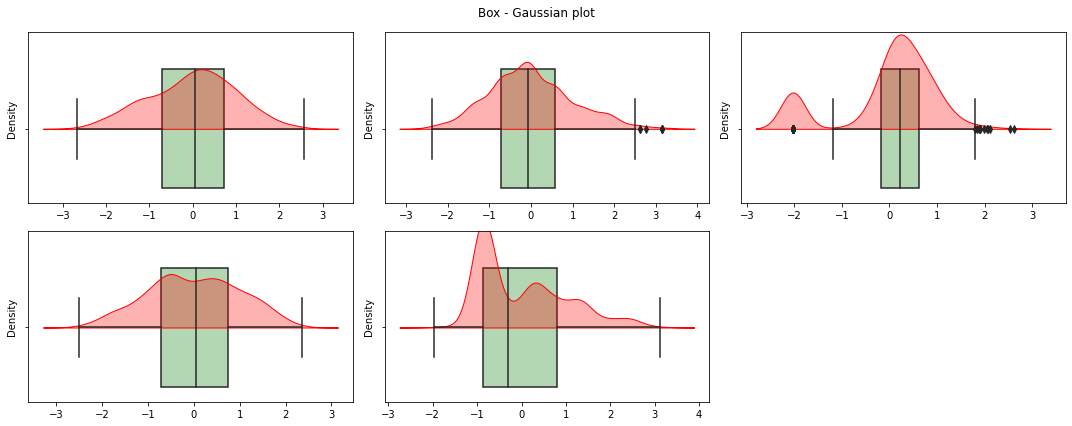

In [45]:
data_plot (df_OR,
          Pair_plot=False,
          Dist_Plot=False,
          Plot_violinplot=False,
          Plot_confusionMatrix=False,
          box_Gaussian=True)

In [26]:
df_OR.columns=['A1', 'A4', 'A5', 'A8', 'A10']
df_corr=pd.concat([df_OR,heart.target], axis=1)
df_corr

,A1,A4,A5,A8,A10,target
0,63,145,233,150,0.0,0
1,67,160,286,108,1.5,1
2,67,120,229,129,2.6,1
4,41,130,204,172,1.4,0
5,56,120,236,178,0.8,0
...,...,...,...,...,...,...
915,54,127,333,126,0.0,1
916,62,130,139,154,0.0,0
917,55,122,223,128,0.0,1
918,58,130,385,100,0.0,0


<AxesSubplot:>

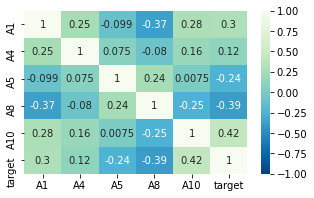

In [36]:
plt.figure(figsize=(5, 3))
sns.heatmap(df_corr.corr(),vmin=-1,vmax=1, annot=True,cmap='GnBu_r')